In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from time import time

# Taking the dataset as input

In [42]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

![](https://media.istockphoto.com/photos/illustration-of-heart-medical-concept-picture-id530199842?b=1&k=20&m=530199842&s=170667a&w=0&h=yZdSVVcbin1aQvpMUXzqsyqrRRrQGwkAUeBuR5BOF5A=)

In [43]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
target = df['target']

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Checking for Missing Values

In [46]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
df.groupby('thal').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
thal,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,18,18,18,18,18,18,18,18,18,18,18,18,18
2,166,166,166,166,166,166,166,166,166,166,166,166,166
3,117,117,117,117,117,117,117,117,117,117,117,117,117


# Working on Categorical Variable Columns

In [48]:
for i in range(0, 303):
  if df['sex'][i] == 1:
   df['sex'][i] = 'Yes'
  else:
   df['sex'][i] = 'No'
for i in range(0, 303):
  if df['cp'][i] == 0:
   df['cp'][i] = 'Zero CP'
  elif df['cp'][i] == 1:
   df['cp'][i] = 'First CP'
  elif df['cp'][i] == 2:
   df['cp'][i] = 'Second CP'
  else:
   df['cp'][i] = 'Third CP'
for i in range(0, 303):
  if df['fbs'][i] == 1:
   df['fbs'][i] = 'Yes FBS'
  else:
   df['fbs'][i] = 'No FBS'
for i in range(0, 303):
  if df['restecg'][i] == 1:
   df['restecg'][i] = 'Yes ECG'
  else:
   df['restecg'][i] = 'No ECG'
for i in range(0, 303):
  if df['exang'][i] == 1:
   df['exang'][i] = 'Yes EXANG'
  else:
   df['exang'][i] = 'No EXANG'
for i in range(0, 303):
  if df['slope'][i] == 0:
   df['slope'][i] = 'Zero SLOPE'
  elif df['slope'][i] == 1:
   df['slope'][i] = 'First SLOPE'
  else:
   df['slope'][i] = 'Second SLOPE'
for i in range(0, 303):
  if df['thal'][i] == 0:
   df['thal'][i] = 'Zero THAL'
  elif df['thal'][i] == 1:
   df['thal'][i] = 'First THAL'
  elif df['thal'][i] == 2:
   df['thal'][i] = 'Second THAL'
  else:
   df['thal'][i] = 'Third THAL'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [49]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Yes,Third CP,145,233,Yes FBS,No ECG,150,No EXANG,2.3,Zero SLOPE,0,First THAL,1
1,37,Yes,Second CP,130,250,No FBS,Yes ECG,187,No EXANG,3.5,Zero SLOPE,0,Second THAL,1
2,41,No,First CP,130,204,No FBS,No ECG,172,No EXANG,1.4,Second SLOPE,0,Second THAL,1
3,56,Yes,First CP,120,236,No FBS,Yes ECG,178,No EXANG,0.8,Second SLOPE,0,Second THAL,1
4,57,No,Zero CP,120,354,No FBS,Yes ECG,163,Yes EXANG,0.6,Second SLOPE,0,Second THAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,No,Zero CP,140,241,No FBS,Yes ECG,123,Yes EXANG,0.2,First SLOPE,0,Third THAL,0
299,45,Yes,Third CP,110,264,No FBS,Yes ECG,132,No EXANG,1.2,First SLOPE,0,Third THAL,0
300,68,Yes,Zero CP,144,193,Yes FBS,Yes ECG,141,No EXANG,3.4,First SLOPE,2,Third THAL,0
301,57,Yes,Zero CP,130,131,No FBS,Yes ECG,115,Yes EXANG,1.2,First SLOPE,1,Third THAL,0


In [50]:
df = pd.get_dummies(df, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"], drop_first=True)

In [51]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_Yes,cp_Second CP,cp_Third CP,cp_Zero CP,fbs_Yes FBS,restecg_Yes ECG,exang_Yes EXANG,slope_Second SLOPE,slope_Zero SLOPE,thal_Second THAL,thal_Third THAL,thal_Zero THAL
0,63,145,233,150,2.3,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,1,0,0,0,1,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,0,0,1,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,0,1,1,1,0,1,0,0


In [52]:
df_target = df.drop('target', axis = 1)

In [53]:
df_target['target'] = target

In [54]:
df_final = df_target

In [55]:
df_final.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_Yes,cp_Second CP,cp_Third CP,cp_Zero CP,fbs_Yes FBS,restecg_Yes ECG,exang_Yes EXANG,slope_Second SLOPE,slope_Zero SLOPE,thal_Second THAL,thal_Third THAL,thal_Zero THAL,target
0,63,145,233,150,2.3,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,1,1,0,0,0,1,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,0,0,0,1,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,0,1,1,1,0,1,0,0,1


In [56]:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values

# Splitting the dataset into Train and Test Sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
X_train_sep = X_train[:, 0:5]
X_test_sep = X_test[:, 0:5]

# Data Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sep = sc.fit_transform(X_train_sep)
X_test_sep = sc.transform(X_test_sep)

In [60]:
X_train = X_train[:, 5:]
X_test = X_test[:, 5:]

In [61]:
X_train = np.append(X_train, X_train_sep, axis=1)
X_test = np.append(X_test, X_test_sep, axis=1)

# Creating the ANN Model

In [62]:
model = Sequential([Dense(units=2,input_shape=(18,),activation='relu'),
                    Dense(units=5,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=10,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=2,activation='sigmoid')])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 38        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 15        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
Total params: 135
Trainable params: 135
Non-trainable params: 0
________________________________________________________

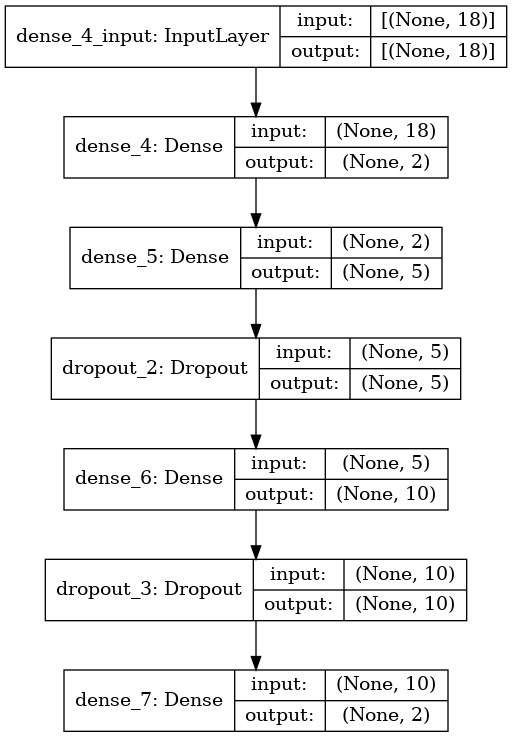

In [64]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Setting Model Parameters

In [65]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy', 'mse'])

# Training the Model

In [66]:
model.fit(
      x=X_train
    , y=y_train
    , batch_size=20
    , epochs=1000
    , shuffle=True
    , verbose=0
)

# Making Predictions on the Test Set

In [67]:
predictions = model.predict(
      x=X_test
    , batch_size=20
    , verbose=0
)

In [68]:
rounded_predictions = np.argmax(predictions, axis=-1)

# Getting some insights about how the Model actually is!

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rounded_predictions)
print(cm)
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test, rounded_predictions), 4)*100))

[[25  4]
 [ 3 29]]
Test Accuracy: 88.52%


In [78]:
#Function for plotting Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [81]:
cm_plot_labels = ['No Heart Disease','Heart Disease']

[[25  4]
 [ 3 29]]


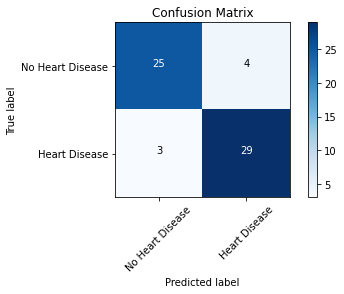

In [82]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [74]:
#Calculating Senstivity (Basically, this is the metric that is really important for medical diagnosis)
#Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive).
#Senstivity = True Positives / (True Positives + False Negatives)

senstivity = cm[1][1]/(cm[1][1]+cm[1][0])
print('Senstivity: {}%'.format(round(senstivity, 3)*100))

Senstivity: 90.60000000000001%


In [75]:
#Calculating Specificity
#Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).
#Specificity = True Negatives / (True Negatives + False Positives)

specificity = cm[0][0]/(cm[0][0]+cm[0][1])
print('Specificity: {}%'.format(round(specificity, 3)*100))

Specificity: 86.2%


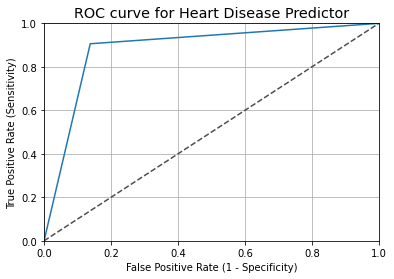

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rounded_predictions)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease Predictor')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [77]:
auc(fpr, tpr) #Our model got a decent area under curve value

0.8841594827586207